In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# add much simpler stuff here
# introduce for loops (in and range)
# introduce functions

In [13]:
# let's write a simulation of cosmic ray air shower

# model is that at each radiation length 
#    electrons/positrons bremstrahlung
#    gammas pair produce
# energy is split among daughter products
#    if electron/positron below critical energy -> stop

In [ ]:
# add several markdown headings here to step people through things

In [14]:
# first radiation length
energy_cr = 160 # Joules, 1e21 eV

electrons = []
positrons = []
gammas = []

# energy of the CR splits into one electron and one positron
electrons_this_radlength = [energy_cr/2.]
positrons_this_radlength = [energy_cr/2.]
gammas_this_radlength    = []

# these arrays store the particles made every radiation length
electrons.append(electrons_this_radlength)
positrons.append(positrons_this_radlength)
gammas.append(gammas_this_radlength)

In [15]:
# next radiation length

# now all electrons make a gamma and an electron (bremstraahlung)
# and all positrons make a gamma and a positron (bremstraahlung)
electrons_last_radlength = electrons_this_radlength
positrons_last_radlength = positrons_this_radlength
gammas_last_radlength = gammas_this_radlength

# reset the arrays
electrons_this_radlength = []
positrons_this_radlength = []
gammas_this_radlength    = []

for el in electrons_last_radlength:
    gammas_this_radlength.append(el/2.)
    electrons_this_radlength.append(el/2.)

for po in positrons_last_radlength:
    gammas_this_radlength.append(po/2.)
    positrons_this_radlength.append(po/2.)
    
for ga in gammas_this_radlength:
    electrons_this_radlength.append(ga/2.)
    positrons_this_radlength.append(ga/2.)
    
# now store all the particles
electrons.append(electrons_this_radlength)
positrons.append(positrons_this_radlength)
gammas.append(gammas_this_radlength)

In [16]:
print electrons_this_radlength
print positrons_this_radlength
print gammas_this_radlength

[40.0, 20.0, 20.0]
[40.0, 20.0, 20.0]
[40.0, 40.0]


In [17]:
print electrons
print positrons
print gammas

[[80.0], [40.0, 20.0, 20.0]]
[[80.0], [40.0, 20.0, 20.0]]
[[], [40.0, 40.0]]


In [18]:
# how many particles are there at each step?
print len(electrons[0]), len(electrons[1])
print len(positrons[0]), len(positrons[1])
print len(gammas[0]), len(gammas[1])

1 3
1 3
0 2


In [19]:
# how many particles are there at each step?
for i_radlength in range(len(electrons)):
    print "Radiation Length: ", i_radlength
    print "    Number of electrons: ", len(electrons[i_radlength])
    print "    Number of positrons: ", len(positrons[i_radlength])
    print "    Number of gammas: ", len(gammas[i_radlength])

Radiation Length:  0
    Number of electrons:  1
    Number of positrons:  1
    Number of gammas:  0
Radiation Length:  1
    Number of electrons:  3
    Number of positrons:  3
    Number of gammas:  2


In [20]:
# now we want to loop over many radiation lengths
n_radlengths = 10

# reset so we are starting at the beginning
# first radiation length
energy_cr = 160 # Joules, 1e21 eV

electrons = []
positrons = []
gammas = []

# energy of the CR splits into one electron and one positron
electrons_this_radlength = [energy_cr/2.]
positrons_this_radlength = [energy_cr/2.]
gammas_this_radlength    = []

# these arrays store the particles made every radiation length
electrons.append(electrons_this_radlength)
positrons.append(positrons_this_radlength)
gammas.append(gammas_this_radlength)

for i_radlength in range(n_radlengths):
    
    # next radiation length

    # now all electrons make a gamma and an electron (bremstraahlung)
    # and all positrons make a gamma and a positron (bremstraahlung)
    electrons_last_radlength = electrons_this_radlength
    positrons_last_radlength = positrons_this_radlength
    gammas_last_radlength = gammas_this_radlength

    # reset the arrays
    electrons_this_radlength = []
    positrons_this_radlength = []
    gammas_this_radlength    = []

    for el in electrons_last_radlength:
        gammas_this_radlength.append(el/2.)
        electrons_this_radlength.append(el/2.)

    for po in positrons_last_radlength:
        gammas_this_radlength.append(po/2.)
        positrons_this_radlength.append(po/2.)

    for ga in gammas_this_radlength:
        electrons_this_radlength.append(ga/2.)
        positrons_this_radlength.append(ga/2.)

    # now store all the particles
    electrons.append(electrons_this_radlength)
    positrons.append(positrons_this_radlength)
    gammas.append(gammas_this_radlength)
    
    print i_radlength, ": ", len(electrons_this_radlength) + len(positrons_this_radlength) + len(gammas_this_radlength)

0 :  8
1 :  24
2 :  72
3 :  216
4 :  648
5 :  1944
6 :  5832
7 :  17496
8 :  52488
9 :  157464


In [21]:
# how many particles are there at each step?
for i_radlength in range(len(electrons)):
    print "Radiation Length: ", i_radlength
    print "    Number of electrons: ", len(electrons[i_radlength])
    print "    Number of positrons: ", len(positrons[i_radlength])
    print "    Number of gammas: ", len(gammas[i_radlength])

Radiation Length:  0
    Number of electrons:  1
    Number of positrons:  1
    Number of gammas:  0
Radiation Length:  1
    Number of electrons:  3
    Number of positrons:  3
    Number of gammas:  2
Radiation Length:  2
    Number of electrons:  9
    Number of positrons:  9
    Number of gammas:  6
Radiation Length:  3
    Number of electrons:  27
    Number of positrons:  27
    Number of gammas:  18
Radiation Length:  4
    Number of electrons:  81
    Number of positrons:  81
    Number of gammas:  54
Radiation Length:  5
    Number of electrons:  243
    Number of positrons:  243
    Number of gammas:  162
Radiation Length:  6
    Number of electrons:  729
    Number of positrons:  729
    Number of gammas:  486
Radiation Length:  7
    Number of electrons:  2187
    Number of positrons:  2187
    Number of gammas:  1458
Radiation Length:  8
    Number of electrons:  6561
    Number of positrons:  6561
    Number of gammas:  4374
Radiation Length:  9
    Number of electrons: 

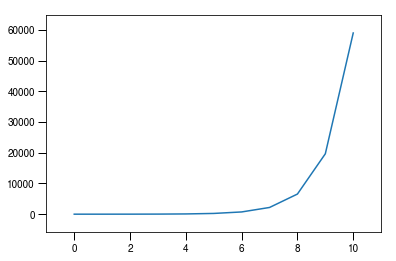

In [22]:
plt.plot(range(n_radlengths+1), [len(electrons[i]) for i in range(len(electrons))])

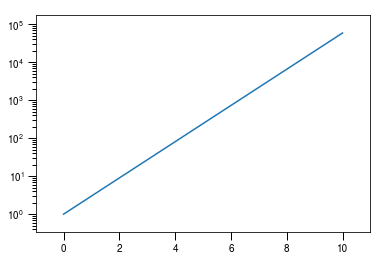

In [23]:
plt.semilogy(range(n_radlengths+1), [len(electrons[i]) for i in range(len(electrons))])

In [24]:
# we can simplify this by defining a function
def make_particles(electrons, positrons, gammas):
    # now all electrons make a gamma and an electron (bremstraahlung)
    # and all positrons make a gamma and a positron (bremstraahlung)
    electrons_last_radlength = electrons
    positrons_last_radlength = positrons
    gammas_last_radlength = gammas

    # reset the arrays
    electrons = []
    positrons = []
    gammas    = []
    
    for el in electrons_last_radlength:
        gammas.append(el/2.)
        electrons.append(el/2.)

    for po in positrons_last_radlength:
        gammas.append(po/2.)
        positrons.append(po/2.)

    for ga in gammas_this_radlength:
        electrons.append(ga/2.)
        positrons.append(ga/2.)
    
    return electrons, positrons, gammas

In [25]:
n_radlengths = 10

# reset so we are starting at the beginning
# first radiation length
energy_cr = 160 # Joules, 1e21 eV

electrons = []
positrons = []
gammas = []

# energy of the CR splits into one electron and one positron
electrons_this_radlength = [energy_cr/2.]
positrons_this_radlength = [energy_cr/2.]
gammas_this_radlength    = []

# these arrays store the particles made every radiation length
electrons.append(electrons_this_radlength)
positrons.append(positrons_this_radlength)
gammas.append(gammas_this_radlength)

for i_radlength in range(n_radlengths):
    
    # next radiation length
    print i_radlength
    electrons_this_radlength, \
    positrons_this_radlength, \
    gammas_this_radlength = make_particles(electrons_this_radlength,
                                          positrons_this_radlength,
                                          gammas_this_radlength)

    # now store all the particles
    electrons.append(electrons_this_radlength)
    positrons.append(positrons_this_radlength)
    gammas.append(gammas_this_radlength)

0
1
2
3
4
5
6
7
8
9


In [26]:
# what are the average energies of these particles?
average_energy_electrons = []
for el in electrons:
    average_energy_electrons.append( np.mean(el) ) 
average_energy_positrons = []
for po in positrons:
    average_energy_positrons.append( np.mean(po) ) 
average_energy_gammas = []
for ga in gammas:
    average_energy_gammas.append( np.mean(ga) ) 


/Users/wissels/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wissels/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


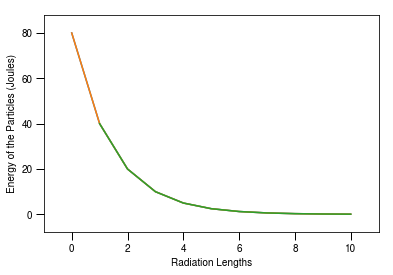

In [27]:
plt.plot(range(n_radlengths+1), average_energy_electrons)
plt.plot(range(n_radlengths+1), average_energy_positrons)
plt.plot(range(n_radlengths+1), average_energy_gammas)
plt.xlabel("Radiation Lengths")
plt.ylabel("Energy of the Particles (Joules)")